In [2612]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import metrics
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import classification_report



In [2613]:

!pip install seaborn


In [2614]:
book_df = pd.read_csv("C:\\Users\\shash\\Documents\\DSTI\\Python_MachineLearning\\Booksrating_Project\\books.csv", index_col="bookID" )

In [2615]:
book_df.columns

Index(['title', 'authors', 'average_rating', 'isbn', 'isbn13', 'language_code',
       'num_pages', 'ratings_count', 'text_reviews_count', 'publication_date',
       'publisher'],
      dtype='object')

In [2616]:
#information regarding the columns
book_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11127 entries, 1 to 45641
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   title               11127 non-null  object 
 1   authors             11127 non-null  object 
 2   average_rating      11127 non-null  float64
 3   isbn                11127 non-null  object 
 4   isbn13              11127 non-null  int64  
 5   language_code       11127 non-null  object 
 6   num_pages           11127 non-null  int64  
 7   ratings_count       11127 non-null  int64  
 8   text_reviews_count  11127 non-null  int64  
 9   publication_date    11127 non-null  object 
 10  publisher           11127 non-null  object 
dtypes: float64(1), int64(4), object(6)
memory usage: 1.0+ MB


In [2617]:
book_df

,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher
bookID,,,,,,,,,,,
1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPré,4.57,439785960,9780000000000,eng,652,2095690,27591,9/16/2006,Scholastic Inc.
2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling/Mary GrandPré,4.49,439358078,9780000000000,eng,870,2153167,29221,9/1/2004,Scholastic Inc.
4,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.42,439554896,9780000000000,eng,352,6333,244,11/1/2003,Scholastic
5,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling/Mary GrandPré,4.56,043965548X,9780000000000,eng,435,2339585,36325,5/1/2004,Scholastic Inc.
8,Harry Potter Boxed Set Books 1-5 (Harry Potte...,J.K. Rowling/Mary GrandPré,4.78,439682584,9780000000000,eng,2690,41428,164,9/13/2004,Scholastic
...,...,...,...,...,...,...,...,...,...,...,...
45631,Expelled from Eden: A William T. Vollmann Reader,William T. Vollmann/Larry McCaffery/Michael He...,4.06,1560254416,9780000000000,eng,512,156,20,12/21/2004,Da Capo Press
45633,You Bright and Risen Angels,William T. Vollmann,4.08,140110879,9780000000000,eng,635,783,56,12/1/1988,Penguin Books
45634,The Ice-Shirt (Seven Dreams #1),William T. Vollmann,3.96,140131965,9780000000000,eng,415,820,95,8/1/1993,Penguin Books


In [2618]:
book_df.head(5)

,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher
bookID,,,,,,,,,,,
1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPré,4.57,439785960,9780000000000,eng,652,2095690,27591,9/16/2006,Scholastic Inc.
2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling/Mary GrandPré,4.49,439358078,9780000000000,eng,870,2153167,29221,9/1/2004,Scholastic Inc.
4,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.42,439554896,9780000000000,eng,352,6333,244,11/1/2003,Scholastic
5,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling/Mary GrandPré,4.56,043965548X,9780000000000,eng,435,2339585,36325,5/1/2004,Scholastic Inc.
8,Harry Potter Boxed Set Books 1-5 (Harry Potte...,J.K. Rowling/Mary GrandPré,4.78,439682584,9780000000000,eng,2690,41428,164,9/13/2004,Scholastic


In [2619]:
#checking for any duplicates
book_df.duplicated().any()

False

In [2620]:
#dropping Column isbn13
book_df=book_df.drop(columns='isbn13')

In [2621]:
#dropping column isbn
book_df=book_df.drop(columns='isbn')

In [2622]:
#to find the missing values in each column
book_df.isna().sum()

title                 0
authors               0
average_rating        0
language_code         0
num_pages             0
ratings_count         0
text_reviews_count    0
publication_date      0
publisher             0
dtype: int64

In [2623]:
book_df.describe()

,average_rating,num_pages,ratings_count,text_reviews_count
count,11127.000000,11127.000000,1.112700e+04,11127.000000
mean,3.933631,336.376921,1.793641e+04,541.854498
std,0.352445,241.127305,1.124794e+05,2576.176608
min,0.000000,0.000000,0.000000e+00,0.000000
25%,3.770000,192.000000,1.040000e+02,9.000000
50%,3.960000,299.000000,7.450000e+02,46.000000
75%,4.135000,416.000000,4.993500e+03,237.500000
max,5.000000,6576.000000,4.597666e+06,94265.000000


In [2624]:
# count of number of books published under each publisher
book_df.publisher.value_counts()

Vintage                        318
Penguin Books                  261
Penguin Classics               184
Mariner Books                  150
Ballantine Books               144
                              ... 
University of Calgary Press      1
Marlowe & Company                1
University Press of America      1
Abstract Studio                  1
Sounds True                      1
Name: publisher, Length: 2292, dtype: int64

In [2625]:
# count of  number of books written by each Author
book_df.authors.value_counts()

Stephen King                                              40
P.G. Wodehouse                                            40
Rumiko Takahashi                                          39
Orson Scott Card                                          35
Agatha Christie                                           33
                                                          ..
Ian Glasper                                                1
Legs McNeil/Gillian McCain                                 1
Adam Woog                                                  1
Mikal Gilmore                                              1
William T. Vollmann/Larry McCaffery/Michael Hemmingson     1
Name: authors, Length: 6643, dtype: int64

In [2626]:
#correlation between columns
book_df.corr()

,average_rating,num_pages,ratings_count,text_reviews_count
average_rating,1.000000,0.150809,0.038205,0.033734
num_pages,0.150809,1.000000,0.034353,0.036998
ratings_count,0.038205,0.034353,1.000000,0.865979
text_reviews_count,0.033734,0.036998,0.865979,1.000000


In [2627]:
# count of number of books in different languages
book_df.language_code.value_counts()

eng      8911
en-US    1409
spa       218
en-GB     214
fre       144
ger        99
jpn        46
mul        19
zho        14
grc        11
por        10
en-CA       7
ita         5
enm         3
lat         3
swe         2
rus         2
srp         1
nl          1
msa         1
glg         1
wel         1
ara         1
nor         1
tur         1
gla         1
ale         1
Name: language_code, dtype: int64

(array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5]),
 [Text(0.0, 0, '0.0'),
  Text(0.5, 0, '0.5'),
  Text(1.0, 0, '1.0'),
  Text(1.5, 0, '1.5'),
  Text(2.0, 0, '2.0'),
  Text(2.5, 0, '2.5'),
  Text(3.0, 0, '3.0'),
  Text(3.5, 0, '3.5'),
  Text(4.0, 0, '4.0'),
  Text(4.5, 0, '4.5')])

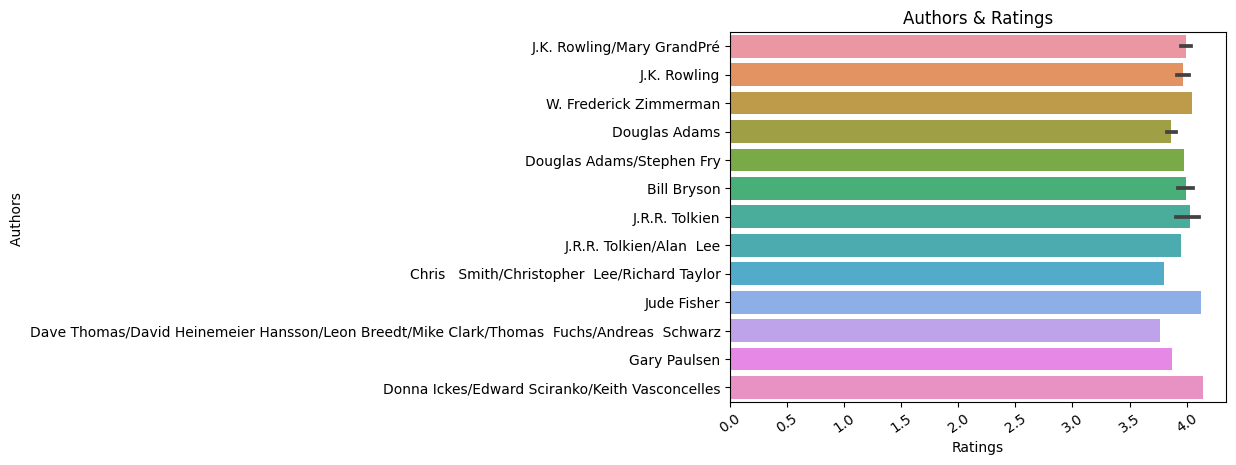

In [2628]:
# plotting the values of authors and ratings
sns.barplot(x=book_df['average_rating'].value_counts().head(30).index, y=book_df['authors'].head(30))
plt.title('Authors & Ratings')
plt.xlabel('Ratings')
plt.ylabel('Authors ')
plt.xticks(rotation=35)

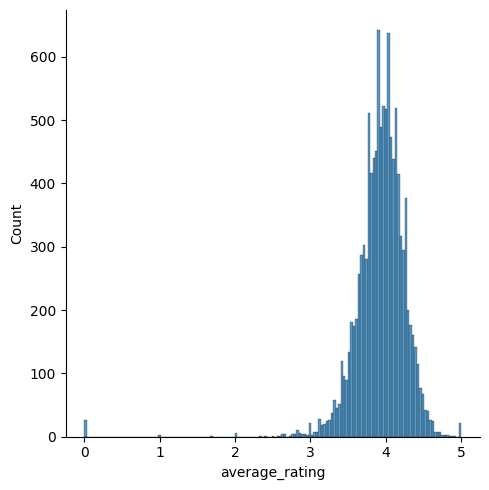

In [2629]:
#plotting count of the average_rating
sns.displot(data=book_df, x="average_rating")

<AxesSubplot: ylabel='language_code'>

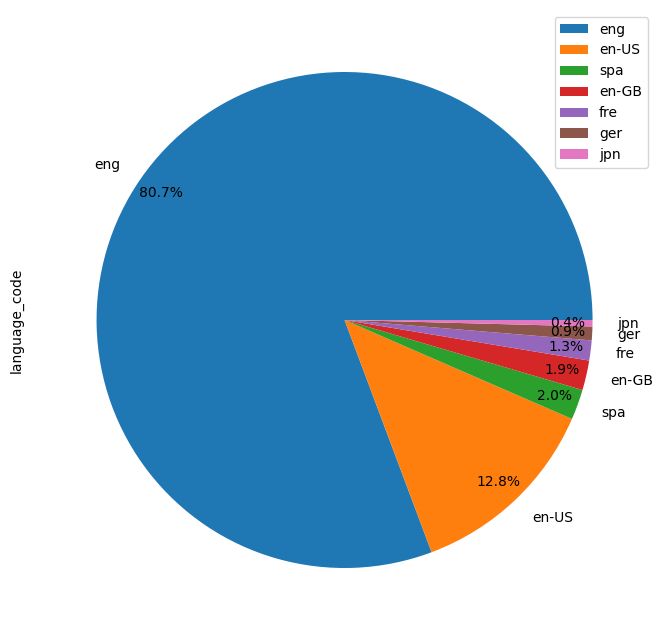

In [2630]:
#plotting the percentage of different languages of books 
book_df.language_code.value_counts().head(7).plot(kind='pie', figsize=(8,30), legend=True,autopct='%1.1f%%', pctdistance=0.9,radius=1)

<AxesSubplot: xlabel='bookID', ylabel='average_rating'>

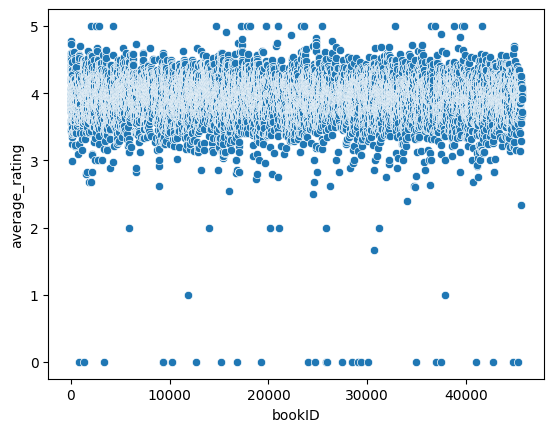

In [2631]:
# scatterplot to see the outliers
sns.scatterplot(data=book_df['average_rating'])

<AxesSubplot: xlabel='bookID', ylabel='num_pages'>

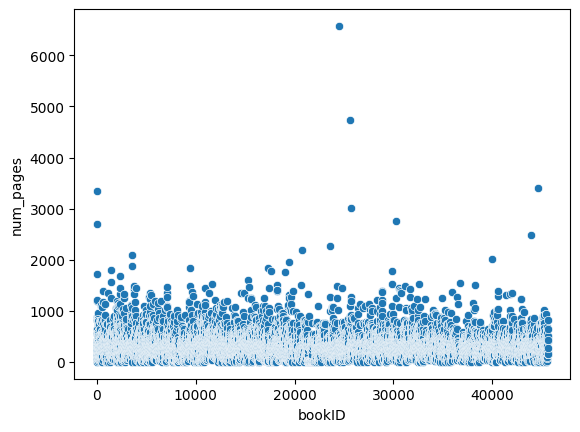

In [2632]:
sns.scatterplot(data=book_df['num_pages'])

In [2633]:
#book_df=book_df.drop(book_df.index[book_df['  num_pages'] >=4000 ])



In [2634]:
#book_df=book_df.drop(book_df.index[book_df['average_rating'] <=2 ])

<AxesSubplot: xlabel='bookID', ylabel='ratings_count'>

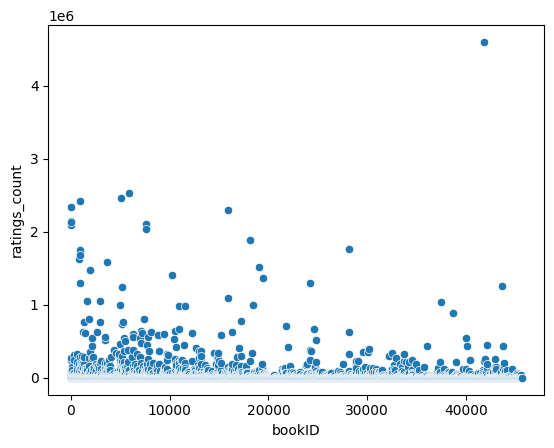

In [2635]:
sns.scatterplot(data=book_df['ratings_count'])


<AxesSubplot: xlabel='bookID', ylabel='text_reviews_count'>

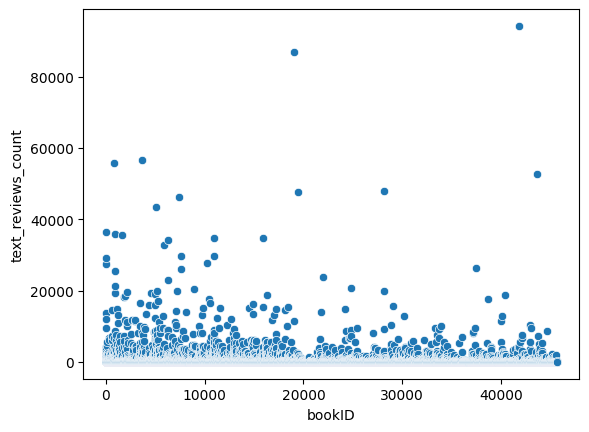

In [2636]:
sns.scatterplot(data=book_df['text_reviews_count'])


In [2637]:
#(book_df.text_reviews_count>6000).value_counts()

In [2638]:
#book_df=book_df.drop(book_df.index[book_df['text_reviews_count'] >=6000 ])

In [2639]:
#sns.scatterplot(data=book_df['text_reviews_count'])

In [2640]:
le = preprocessing.LabelEncoder()
book_df['title'] = le.fit_transform(book_df['title'])

In [2641]:
book_df.title

bookID
1         3071
2         3072
4         3069
5         3074
8         3064
         ...  
45631     2430
45633    10220
45634     7844
45639     5422
45641     3950
Name: title, Length: 11127, dtype: int32

In [2642]:
# encode authors column
book_df['authors'] = le.fit_transform(book_df['authors'])

In [2643]:
book_df.authors


bookID
1        2628
2        2628
4        2624
5        2628
8        2628
         ... 
45631    6560
45633    6559
45634    6559
45639    6559
45641    4119
Name: authors, Length: 11127, dtype: int32

In [2644]:
# encode language code column
book_df['language_code'] = le.fit_transform(book_df['language_code'])
book_df

,title,authors,average_rating,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher
bookID,,,,,,,,,
1,3071,2628,4.57,5,652,2095690,27591,9/16/2006,Scholastic Inc.
2,3072,2628,4.49,5,870,2153167,29221,9/1/2004,Scholastic Inc.
4,3069,2624,4.42,5,352,6333,244,11/1/2003,Scholastic
5,3074,2628,4.56,5,435,2339585,36325,5/1/2004,Scholastic Inc.
8,3064,2628,4.78,5,2690,41428,164,9/13/2004,Scholastic
...,...,...,...,...,...,...,...,...,...
45631,2430,6560,4.06,5,512,156,20,12/21/2004,Da Capo Press
45633,10220,6559,4.08,5,635,783,56,12/1/1988,Penguin Books
45634,7844,6559,3.96,5,415,820,95,8/1/1993,Penguin Books


In [2645]:
# encode publisher column
book_df['publisher'] = le.fit_transform(book_df['publisher'])
book_df

,title,authors,average_rating,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher
bookID,,,,,,,,,
1,3071,2628,4.57,5,652,2095690,27591,9/16/2006,1780
2,3072,2628,4.49,5,870,2153167,29221,9/1/2004,1780
4,3069,2624,4.42,5,352,6333,244,11/1/2003,1775
5,3074,2628,4.56,5,435,2339585,36325,5/1/2004,1780
8,3064,2628,4.78,5,2690,41428,164,9/13/2004,1775
...,...,...,...,...,...,...,...,...,...
45631,2430,6560,4.06,5,512,156,20,12/21/2004,498
45633,10220,6559,4.08,5,635,783,56,12/1/1988,1487
45634,7844,6559,3.96,5,415,820,95,8/1/1993,1487


In [2646]:
book_df_processed = book_df.drop(columns=[ 'publication_date'])
book_df_processed

,title,authors,average_rating,language_code,num_pages,ratings_count,text_reviews_count,publisher
bookID,,,,,,,,
1,3071,2628,4.57,5,652,2095690,27591,1780
2,3072,2628,4.49,5,870,2153167,29221,1780
4,3069,2624,4.42,5,352,6333,244,1775
5,3074,2628,4.56,5,435,2339585,36325,1780
8,3064,2628,4.78,5,2690,41428,164,1775
...,...,...,...,...,...,...,...,...
45631,2430,6560,4.06,5,512,156,20,498
45633,10220,6559,4.08,5,635,783,56,1487
45634,7844,6559,3.96,5,415,820,95,1487


In [2647]:
#correlation between columns
book_df_processed.corr()

,title,authors,average_rating,language_code,num_pages,ratings_count,text_reviews_count,publisher
title,1.000000,0.029007,0.027518,-0.038720,0.017777,0.003310,0.009757,0.024832
authors,0.029007,1.000000,0.022339,-0.002198,0.004334,0.001521,-0.007056,0.037176
average_rating,0.027518,0.022339,1.000000,0.029932,0.150809,0.038205,0.033734,0.028582
language_code,-0.038720,-0.002198,0.029932,1.000000,0.013476,-0.015895,-0.024430,0.019747
num_pages,0.017777,0.004334,0.150809,0.013476,1.000000,0.034353,0.036998,0.012359
ratings_count,0.003310,0.001521,0.038205,-0.015895,0.034353,1.000000,0.865979,-0.003797
text_reviews_count,0.009757,-0.007056,0.033734,-0.024430,0.036998,0.865979,1.000000,-0.005801
publisher,0.024832,0.037176,0.028582,0.019747,0.012359,-0.003797,-0.005801,1.000000


In [2648]:
from sklearn.model_selection import train_test_split

In [2649]:
df_train, df_test = train_test_split(book_df_processed,test_size = 0.2)

In [2650]:
len(book_df_processed)

11127

In [2651]:
len(df_train)

8901

In [2652]:
len(df_test)

2226

In [2653]:
df_train

,title,authors,average_rating,language_code,num_pages,ratings_count,text_reviews_count,publisher
bookID,,,,,,,,
28944,375,3496,3.61,4,96,82,6,1366
32483,6013,4904,3.99,5,608,1541,131,88
12203,2748,6068,3.88,5,342,731,69,60
700,5670,2009,3.77,5,826,44,3,235
30232,4132,2450,4.21,5,184,609,6,560
...,...,...,...,...,...,...,...,...
34067,4703,6513,4.07,5,284,9,3,347
43817,2227,326,3.58,21,352,61,8,619
33566,6934,2281,3.77,5,225,49,9,2131


In [2654]:
df_train.columns

Index(['title', 'authors', 'average_rating', 'language_code', 'num_pages',
       'ratings_count', 'text_reviews_count', 'publisher'],
      dtype='object')

In [2655]:
X_train = df_train.loc[:,['title', 'authors', 'num_pages','language_code','ratings_count','text_reviews_count','publisher']].values
y_train = df_train.average_rating.values

In [2656]:
X_test = df_test.loc[:,['title', 'authors', 'num_pages','language_code','ratings_count','text_reviews_count','publisher']].values
y_test = df_test.average_rating.values

In [2657]:
# Linear Regression with the given average_values

In [2658]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [2659]:
y_pred = lr.predict(X_test)


In [2660]:
Actual= y_test.tolist()
Predict= y_pred.tolist()
predictions = pd.DataFrame({'Average_rating': Actual, 'Predicted_values': Predict})

predictions.head(20)

,Average_rating,Predicted_values
0,3.91,3.927728
1,3.84,3.923354
2,3.94,3.923703
3,4.17,3.860874
4,4.09,3.896911
5,4.17,3.941891
6,3.20,3.893829
7,3.76,3.924622
8,4.22,3.895187
9,4.09,3.882852


In [2661]:
r2_score_lr = r2_score(y_test, y_pred)
r2_score_lr

0.03402068355075438

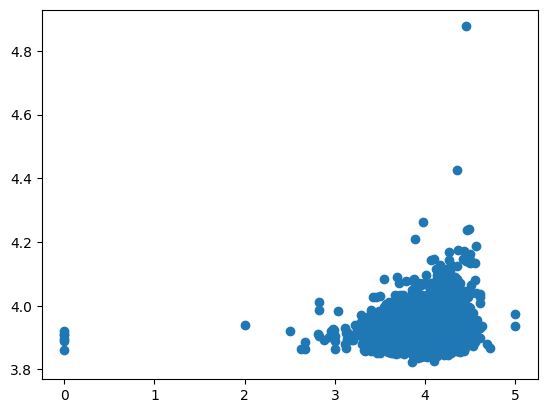

In [2662]:
plt.scatter(Actual, Predict)

In [2663]:
#Decision Tree Regressor

In [2664]:
y_train

array([3.61, 3.99, 3.88, ..., 3.77, 3.9 , 4.05])

In [2665]:
from sklearn.tree import DecisionTreeRegressor

In [2666]:
dtr_model = DecisionTreeRegressor()

In [2667]:
dtr_model.fit(X=X_train,y=y_train)

DecisionTreeRegressor()

In [2668]:
y_pred_dtr = dtr_model.predict(X_test)

In [2669]:
Actual_dtr= y_test.tolist()
Predict_dtr= y_pred_dtr.tolist()
predictions_dtr = pd.DataFrame({'Average_rating': Actual_dtr, 'Predicted_values': Predict_dtr})

predictions_dtr.head(20)

,Average_rating,Predicted_values
0,3.91,4.03
1,3.84,3.95
2,3.94,4.21
3,4.17,3.68
4,4.09,4.46
5,4.17,3.69
6,3.20,4.45
7,3.76,3.36
8,4.22,4.33
9,4.09,4.09


In [2670]:
r2_score_dtr=r2_score(y_test,y_pred_dtr)
r2_score_dtr

-0.42070906931901764

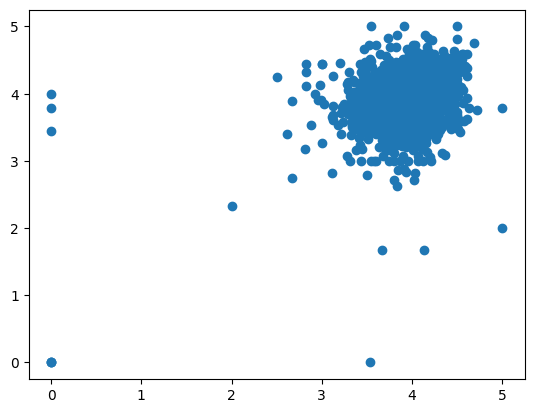

In [2671]:
plt.scatter(Actual_dtr, Predict_dtr)

In [2672]:
# Random Forest Regressor

In [2673]:
from sklearn.ensemble import RandomForestRegressor

In [2674]:
rfr_model = RandomForestRegressor()

In [2675]:
rfr_model.fit(X=X_train,y=y_train)

RandomForestRegressor()

In [2676]:
y_pred_rfr = rfr_model.predict(X_test)

In [2677]:
Actual_rfr= y_test.tolist()
Predict_rfr= y_pred_rfr.tolist()
predictions_rfr = pd.DataFrame({'Average_rating': Actual_rfr, 'Predicted_values': Predict_rfr})

predictions_rfr.head(20)

,Average_rating,Predicted_values
0,3.91,3.8946
1,3.84,3.9673
2,3.94,3.7603
3,4.17,3.9281
4,4.09,3.7692
5,4.17,3.8844
6,3.20,3.9822
7,3.76,3.9656
8,4.22,3.9798
9,4.09,3.9854


In [2678]:
r2_score_rfr=r2_score(y_test,y_pred_rfr)
r2_score_rfr

0.31612670647905494

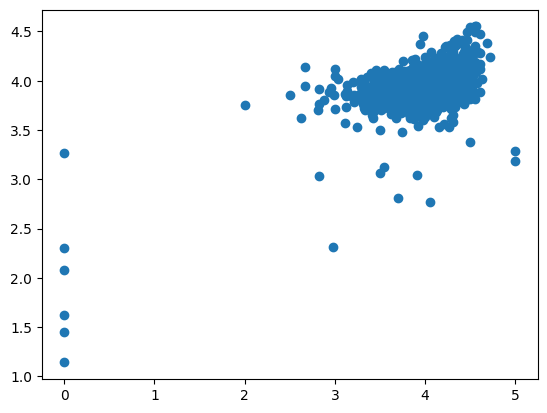

In [2679]:
plt.scatter(Actual_rfr, Predict_rfr)

In [2680]:
#MLP Regressor

In [2681]:
book_df_processed

,title,authors,average_rating,language_code,num_pages,ratings_count,text_reviews_count,publisher
bookID,,,,,,,,
1,3071,2628,4.57,5,652,2095690,27591,1780
2,3072,2628,4.49,5,870,2153167,29221,1780
4,3069,2624,4.42,5,352,6333,244,1775
5,3074,2628,4.56,5,435,2339585,36325,1780
8,3064,2628,4.78,5,2690,41428,164,1775
...,...,...,...,...,...,...,...,...
45631,2430,6560,4.06,5,512,156,20,498
45633,10220,6559,4.08,5,635,783,56,1487
45634,7844,6559,3.96,5,415,820,95,1487


In [2682]:
new_average_rating = round(book_df.average_rating)

new_data = pd.DataFrame({'new_average_rating': new_average_rating}).astype(int)
new_data

,new_average_rating
bookID,
1,5
2,4
4,4
5,5
8,5
...,...
45631,4
45633,4
45634,4


In [2683]:
new_average_rating.min()

0.0

In [2684]:
new_average_rating.max()

5.0

In [2685]:
new_df=pd.concat([book_df_processed, new_data], axis=1)
new_df

,title,authors,average_rating,language_code,num_pages,ratings_count,text_reviews_count,publisher,new_average_rating
bookID,,,,,,,,,
1,3071,2628,4.57,5,652,2095690,27591,1780,5
2,3072,2628,4.49,5,870,2153167,29221,1780,4
4,3069,2624,4.42,5,352,6333,244,1775,4
5,3074,2628,4.56,5,435,2339585,36325,1780,5
8,3064,2628,4.78,5,2690,41428,164,1775,5
...,...,...,...,...,...,...,...,...,...
45631,2430,6560,4.06,5,512,156,20,498,4
45633,10220,6559,4.08,5,635,783,56,1487,4
45634,7844,6559,3.96,5,415,820,95,1487,4


In [2686]:
new_df_processed=new_df.drop(columns=['average_rating'])

In [2687]:
new_df_processed

,title,authors,language_code,num_pages,ratings_count,text_reviews_count,publisher,new_average_rating
bookID,,,,,,,,
1,3071,2628,5,652,2095690,27591,1780,5
2,3072,2628,5,870,2153167,29221,1780,4
4,3069,2624,5,352,6333,244,1775,4
5,3074,2628,5,435,2339585,36325,1780,5
8,3064,2628,5,2690,41428,164,1775,5
...,...,...,...,...,...,...,...,...
45631,2430,6560,5,512,156,20,498,4
45633,10220,6559,5,635,783,56,1487,4
45634,7844,6559,5,415,820,95,1487,4


In [2688]:
from sklearn.model_selection import train_test_split

In [2689]:
new_df_train, new_df_test = train_test_split(new_df_processed,test_size = 0.3)

In [2690]:
len(new_df_processed)

11127

In [2691]:
len(new_df_train)

7788

In [2692]:
len(new_df_test)

3339

In [2693]:
new_df_train

,title,authors,language_code,num_pages,ratings_count,text_reviews_count,publisher,new_average_rating
bookID,,,,,,,,
10593,8844,5795,5,16,357,107,1842,4
28409,8204,6641,5,464,1977,101,1442,4
6115,6069,2420,5,132,1104,114,1487,4
11346,6404,6170,5,174,47998,2479,1572,4
14680,7038,5747,5,532,10856,248,1291,4
...,...,...,...,...,...,...,...,...
12016,4175,2517,5,496,17025,436,1577,4
12043,7899,4795,5,208,34,2,1893,3
36399,1391,651,5,96,2,0,586,4


In [2694]:
new_X_train = new_df_train.loc[:,['title', 'authors', 'num_pages','language_code','ratings_count','text_reviews_count','publisher']].values
new_y_train = new_df_train.new_average_rating.values

In [2695]:
new_X_test = new_df_test.loc[:,['title', 'authors', 'num_pages','language_code','ratings_count','text_reviews_count','publisher']].values
new_y_test = new_df_test.new_average_rating.values

In [2696]:
# Decision Tree Classifier

In [2697]:
from sklearn.tree import DecisionTreeClassifier

In [2698]:
dt_model = DecisionTreeClassifier()

In [2699]:
dt_model.fit(X=new_X_train,y=new_y_train)

DecisionTreeClassifier()

In [2700]:
y_pred_dt = dt_model.predict(new_X_test)

In [2701]:
Actual_dt= new_y_test.tolist()
Predict_dt= y_pred_dt.tolist()
predictions_dt = pd.DataFrame({'Average_rating': Actual_dt, 'Predicted_values': Predict_dt})

predictions_dt.head(20)

,Average_rating,Predicted_values
0,4,4
1,4,4
2,4,4
3,4,3
4,4,4
5,4,4
6,4,4
7,4,4
8,4,4
9,3,4


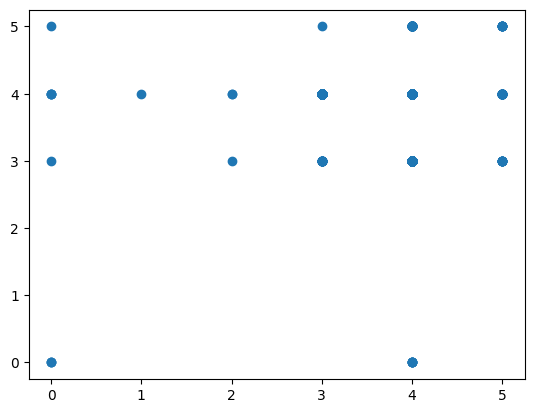

In [2702]:
plt.scatter(Actual_dt,Predict_dt)

In [2703]:
report_dt = classification_report(y_pred=y_pred_dt,y_true=new_y_test,zero_division=0)

In [2704]:
# MLP Classifier 

In [2705]:
from sklearn.neural_network import MLPClassifier

In [2706]:
mlp_model = MLPClassifier(hidden_layer_sizes=(20,10),max_iter=1000)

In [2707]:
mlp_model.fit(X=new_X_train,y=new_y_train)

MLPClassifier(hidden_layer_sizes=(20, 10), max_iter=1000)

In [2708]:
y_pred_mlp = mlp_model.predict(new_X_test)

In [2709]:
Actual_mlp= new_y_test.tolist()
Predict_mlp= y_pred_mlp.tolist()
predictions_mlp = pd.DataFrame({'Average_rating': Actual_mlp, 'Predicted_values': Predict_mlp})

predictions_mlp.head(20)

,Average_rating,Predicted_values
0,4,4
1,4,4
2,4,4
3,4,4
4,4,4
5,4,4
6,4,4
7,4,4
8,4,4
9,3,4


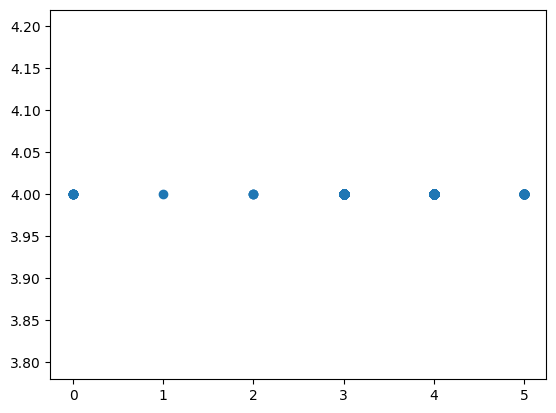

In [2710]:
plt.scatter(Actual_mlp, Predict_mlp)

In [2711]:
report_mlp = classification_report(y_pred=y_pred_mlp,y_true=new_y_test,zero_division=0)

In [2712]:
#Randon Forest Classifier

In [2713]:
from sklearn.ensemble import RandomForestClassifier

In [2714]:
rf_model = RandomForestClassifier()

In [2715]:
rf_model.fit(X=new_X_train,y=new_y_train)

RandomForestClassifier()

In [2716]:
y_pred_rf = rf_model.predict(new_X_test)

In [2717]:
Actual_rf= new_y_test.tolist()
Predict_rf= y_pred_rf.tolist()
predictions_rf = pd.DataFrame({'Average_rating': Actual_rf, 'Predicted_values': Predict_rf})

predictions_rf.head(20)

,Average_rating,Predicted_values
0,4,4
1,4,4
2,4,4
3,4,4
4,4,4
5,4,4
6,4,4
7,4,4
8,4,4
9,3,4


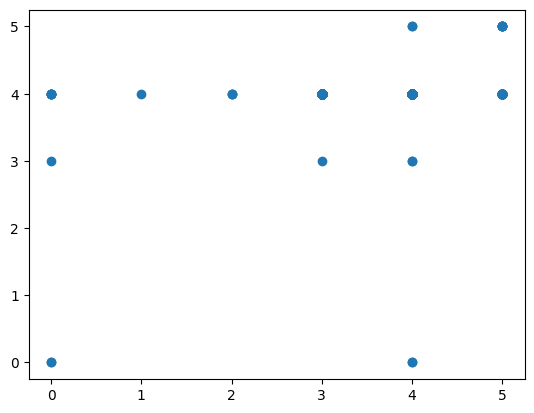

In [2718]:
plt.scatter(Actual_rf,Predict_rf)

In [2719]:
report_rf = classification_report(y_pred=y_pred_rf,y_true=new_y_test,zero_division=0)

In [2720]:
from sklearn import svm

In [2721]:
svm_model=svm.SVC()

In [2722]:
svm_model.fit(X=new_X_train,y=new_y_train)

SVC()

In [2723]:
y_pred_svm = svm_model.predict(new_X_test)

In [2724]:
Actual_svm= new_y_test.tolist()
Predict_svm= y_pred_svm.tolist()
predictions_svm = pd.DataFrame({'Average_rating': Actual_svm, 'Predicted_values': Predict_svm})

predictions_svm.head(20)

,Average_rating,Predicted_values
0,4,4
1,4,4
2,4,4
3,4,4
4,4,4
5,4,4
6,4,4
7,4,4
8,4,4
9,3,4


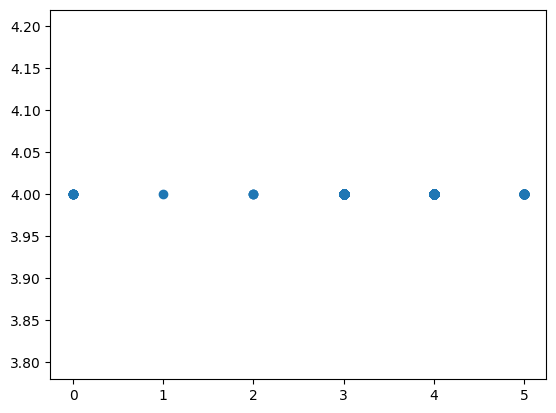

In [2725]:
plt.scatter(Actual_svm,Predict_svm)

In [2726]:
report_svm = classification_report(y_pred=y_pred_svm,y_true=new_y_test,zero_division=0)

In [2727]:
#consolidating all r2_scores 
consolidate = pd.DataFrame({'LinReg': [r2_score_lr],'Dectreereg':[r2_score_dtr],'Randforreg':[r2_score_rfr]})


In [2728]:
consolidate

,LinReg,Dectreereg,Randforreg
0,0.034021,-0.420709,0.316127


In [2729]:
print(report_dt)

              precision    recall  f1-score   support

           0       0.33      0.33      0.33         9
           1       0.00      0.00      0.00         1
           2       0.00      0.00      0.00         3
           3       0.08      0.11      0.09       203
           4       0.93      0.90      0.91      3070
           5       0.14      0.15      0.15        53

    accuracy                           0.84      3339
   macro avg       0.25      0.25      0.25      3339
weighted avg       0.86      0.84      0.85      3339



In [2730]:
print(report_rf)

              precision    recall  f1-score   support

           0       0.50      0.22      0.31         9
           1       0.00      0.00      0.00         1
           2       0.00      0.00      0.00         3
           3       0.25      0.00      0.01       203
           4       0.92      1.00      0.96      3070
           5       0.75      0.11      0.20        53

    accuracy                           0.92      3339
   macro avg       0.40      0.22      0.25      3339
weighted avg       0.88      0.92      0.89      3339



In [2731]:
print(report_mlp)

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         9
           1       0.00      0.00      0.00         1
           2       0.00      0.00      0.00         3
           3       0.00      0.00      0.00       203
           4       0.92      1.00      0.96      3070
           5       0.00      0.00      0.00        53

    accuracy                           0.92      3339
   macro avg       0.15      0.17      0.16      3339
weighted avg       0.85      0.92      0.88      3339



In [2732]:
print(report_svm)

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         9
           1       0.00      0.00      0.00         1
           2       0.00      0.00      0.00         3
           3       0.00      0.00      0.00       203
           4       0.92      1.00      0.96      3070
           5       0.00      0.00      0.00        53

    accuracy                           0.92      3339
   macro avg       0.15      0.17      0.16      3339
weighted avg       0.85      0.92      0.88      3339

